In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [2]:
hd=pd.read_excel("cleveland.xlsx")

In [3]:
hd=hd.drop(hd.index[172], axis=0)

X = hd.iloc[:, :13]

y = hd.iloc[:, 13]
y = y.replace(["negative", "positive"], [0, 1])

In [4]:
std=StandardScaler()
X_std=std.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_std)

#### Real Heart Disease Distribution

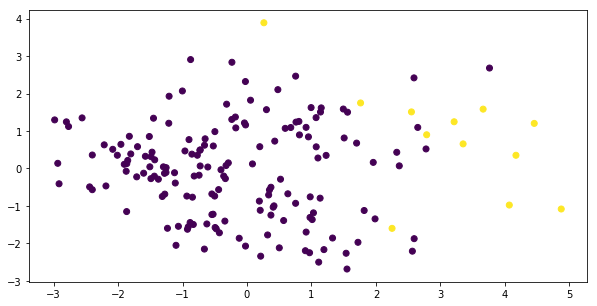

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(X_pca.T[0], X_pca.T[1], c=y)
plt.show()

### 1st Question:

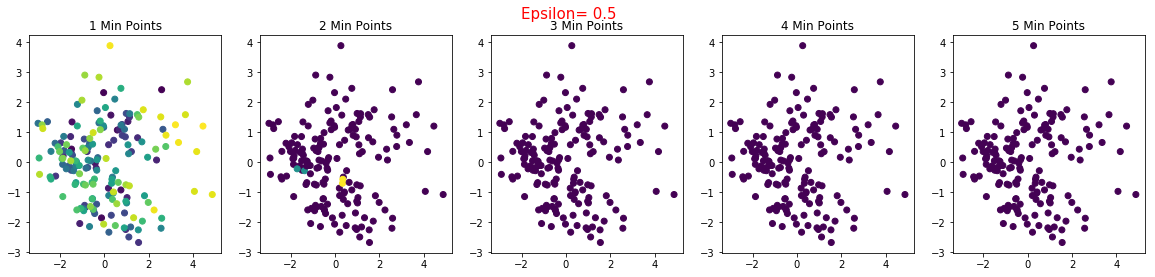

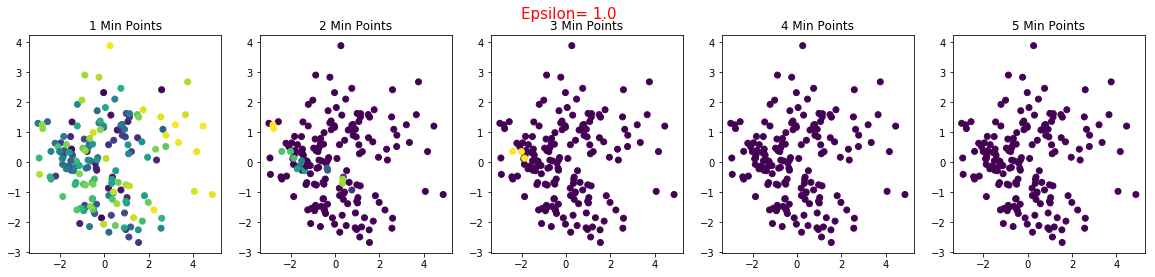

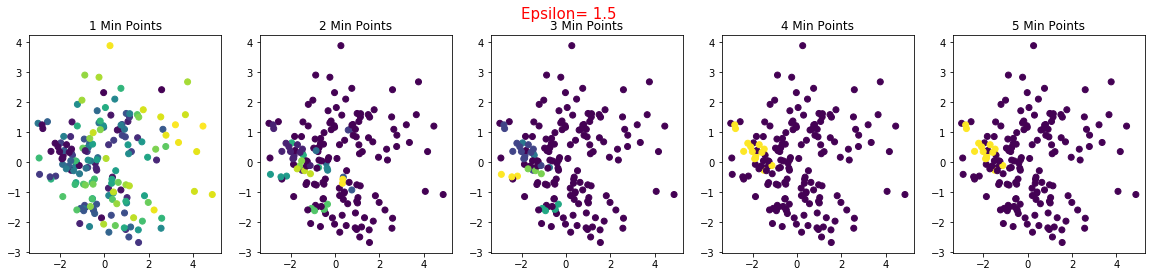

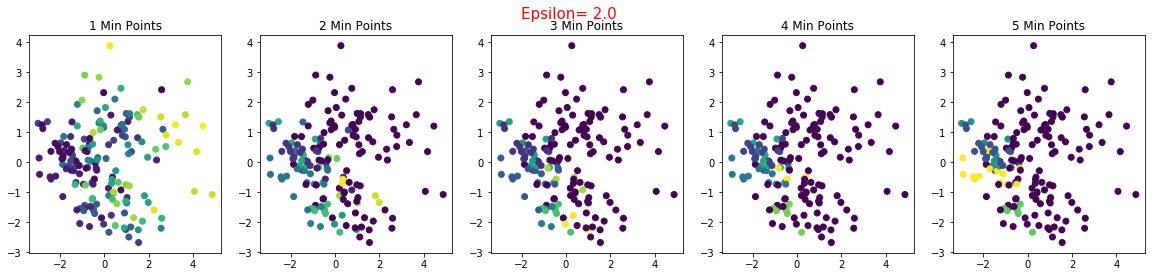

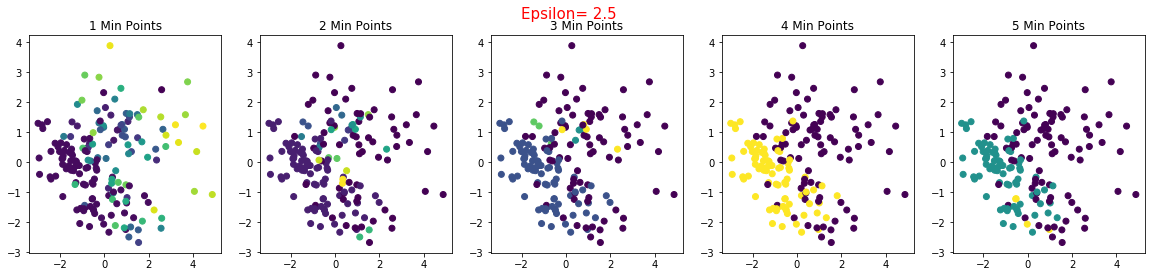

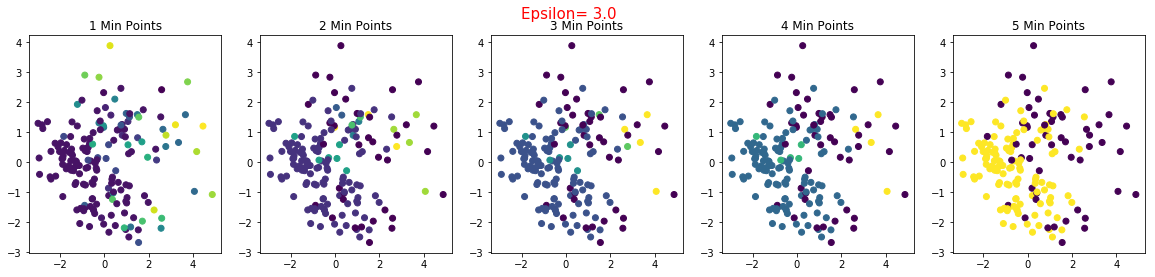

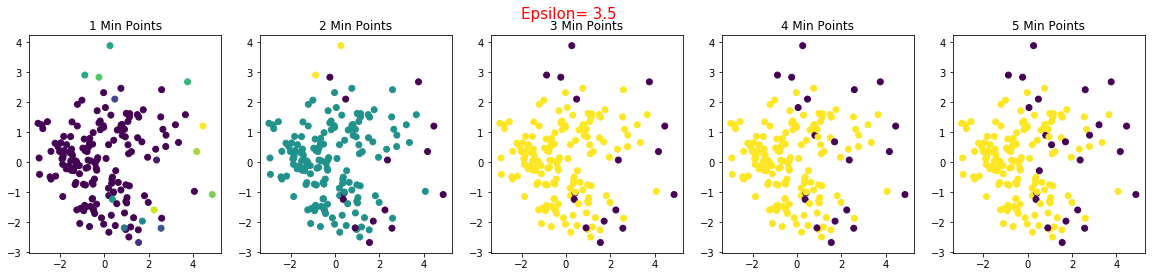

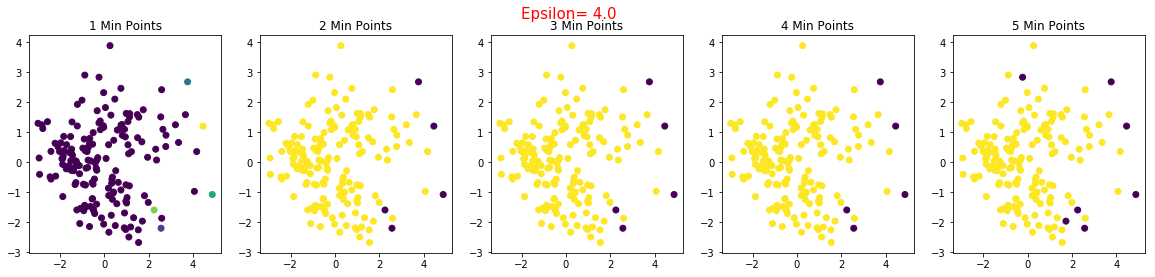

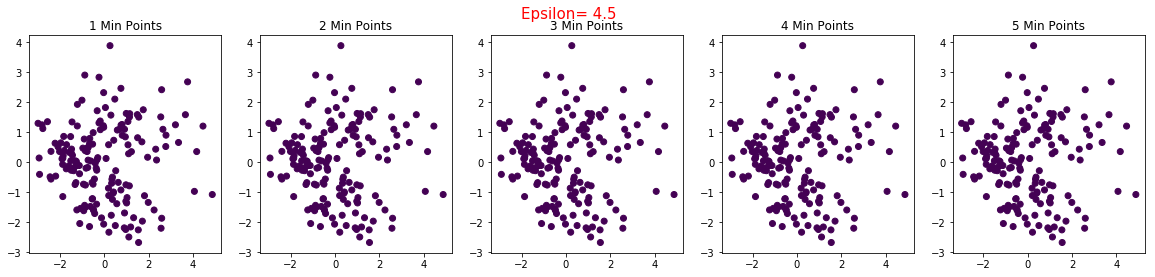

In [11]:
for i in range(1,10):
    f, subp=plt.subplots(1,5,figsize=(20,4))
    
    for j in range(1,6):
        dbs=DBSCAN(eps=i*0.5, min_samples=j)
        cls=dbs.fit_predict(X_std)
        
        subp[j-1].scatter(X_pca.T[0], X_pca.T[1], c=cls)
        subp[j-1].set_title("{} Min Points".format(j))

    plt.suptitle("Epsilon= {}".format(i*0.5), fontsize=15, color="red")
    plt.tight_layout
    plt.show()

### 2nd Question:

It gets harder to cluster the points.

After 4 minimum points, all observations becomes outliers.

If minimum point is set to 2 or less, there comes out too many unnecessary clusters.

### 3rd Question:

At first, all observations are unique clusters themselves.

While epsilon is increasing, observations begins to flock together.

At last, all of them stay in the same cluster.